In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import 
from sklearn.linear_model import LinearRegression

In [70]:
df = sns.load_dataset('anscombe')
df.drop("dataset", axis=1, inplace=True)
df

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


In [71]:
from sklearn.model_selection import train_test_split
x = df[['x']] # Dataframe(2D)
y = df['y'] # Series(1D)

x_train, x_test, y_train, y_test = train_test_split(
    x,y ,test_size=0.3, random_state=0
)

In [72]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [73]:
y_pred = reg.predict(x_test) 

In [74]:
y_score = reg.score(x_test, y_test) # R-Squared
y_score

0.25898956365380377

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


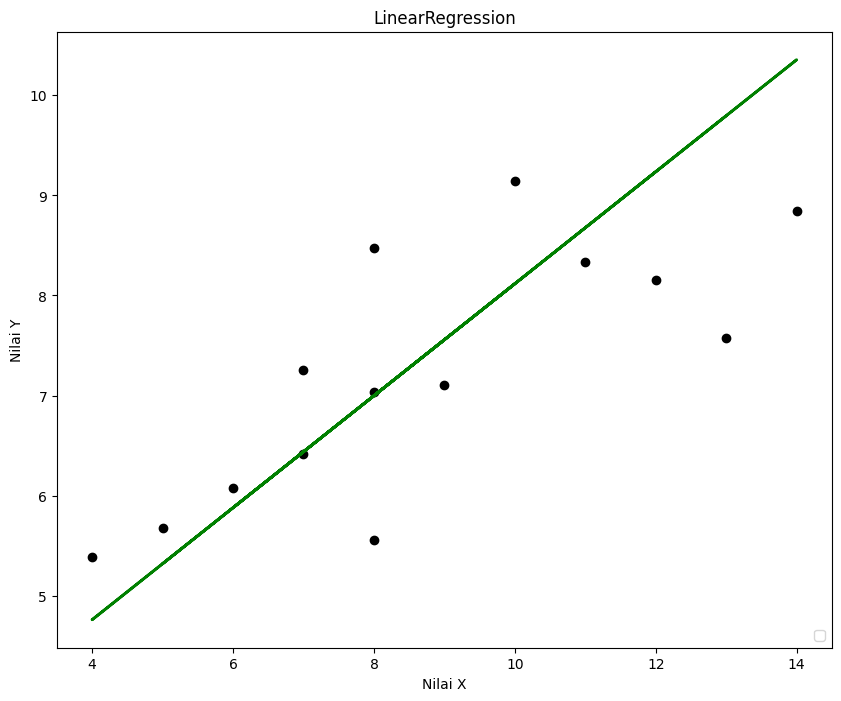

In [75]:
plt.figure(figsize=(10,8))
plt.scatter(x_test, y_test, c="black") # c = colour
plt.plot(x_test, y_pred, c="green", linewidth=2)
plt.legend(loc='lower right') # loc = lokasi (upper/lower right/left)
plt.xlabel("Nilai X")
plt.ylabel("Nilai Y")
plt.title('LinearRegression')
plt.show()

# support vector Machine (svm)

In [76]:
iris = sns.load_dataset('iris')


In [77]:
x2 = iris[['sepal_length', 'sepal_width']]
y2 = iris['species'] # Array/series(1D)

# mengubah nilai yang bukan setosa menjadi non-setosa
y2= np.where(y2 == 'setosa', 'setosa', 'non-setosa')

In [78]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(
    x2, y2, test_size=0.2, random_state=30
)

In [79]:
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(x_train2, y_train2)

SVC(kernel='linear')

In [80]:
y_pred2 = svm.predict(x_test2)
sv = svm.support_vectors_

c:\Users\ROG\KB\venv_A2-22\willyam_049\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'sepal width')

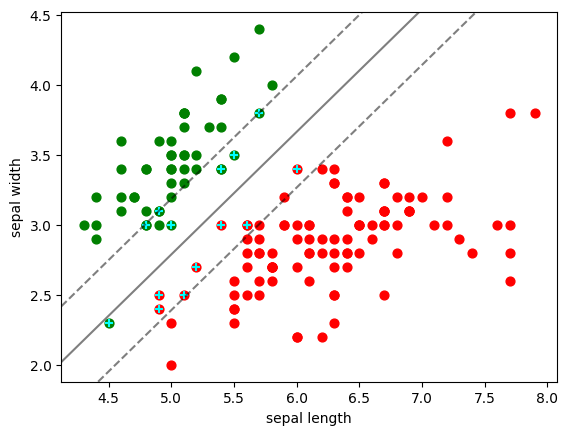

In [81]:
plt
# plot data points dari sentosa
plt.scatter(x2[y2 == 'setosa'].iloc[:,0],
            x2[y2 == 'setosa'].iloc[:,1],
            s=40, c='green', marker='o', label='setosa')
# plot data points dari non sentosa
plt.scatter(x2[y2 == 'non-setosa'].iloc[:,0],
            x2[y2 == 'non-setosa'].iloc[:,1],
            s=40, c='red', marker='o', label='non-setosa')
plt.scatter(sv[:, 0], sv[:, 1], s=40,
color='cyan', marker='+', label='Support Vectors')
# Buat garis Decision Boundary (Ruang Keputusan)
ax = plt.gca() # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Buat sebuah meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), # Linear Space x
np.linspace(ylim[0], ylim[1])) # Linear Space y
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Concatenate
Z = Z.reshape(xx.shape) # Reshape titik agar sesuai dengan sumbu x
# Buat grafik Decision Boundary dan garis Marginnya
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,

linestyles=['--', '-', '--'])

plt.xlabel("sepal length")
plt.ylabel("sepal width")



# Evaluasi Regresi

In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from numpy import sqrt

mae = mean_absolute_error(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(mae, mse, rmse, r2, sep='\n')
print(f"MAE {mae}\nMSE {mse }\nRMSE {rmse}\nR2 {r2}")

0.8299564244494174
0.8299564244494174
0.9110194424102142
0.25898956365380377
MAE 0.8299564244494174
MSE 0.8299564244494174
RMSE 0.9110194424102142
R2 0.25898956365380377


# evaluasi klasifikasi

In [83]:
from sklearn.metrics import classification_report as cr 
hasil = cr(y_test2, y_pred2)

print(hasil)

              precision    recall  f1-score   support

  non-setosa       1.00      1.00      1.00        18
      setosa       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



NameError: name 'df' is not defined

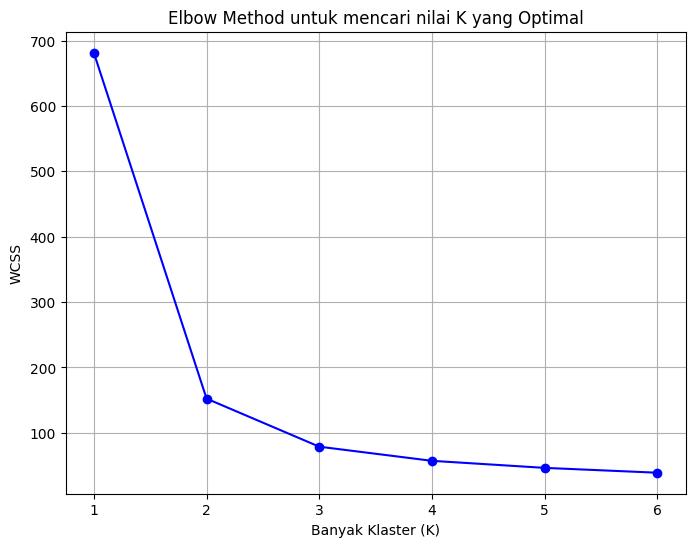

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
iris = sns.load_dataset("iris") # Gunakan dataset Iris dari Seaborn
X = iris.iloc[:, :-1].values # Ambil data-data fiturnya untuk variabel X
wcss = [] # Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok
# Buat loop untuk melatih algoritma K-Means
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)
# Buat grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)

# clustering dengan K-Means

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=1)

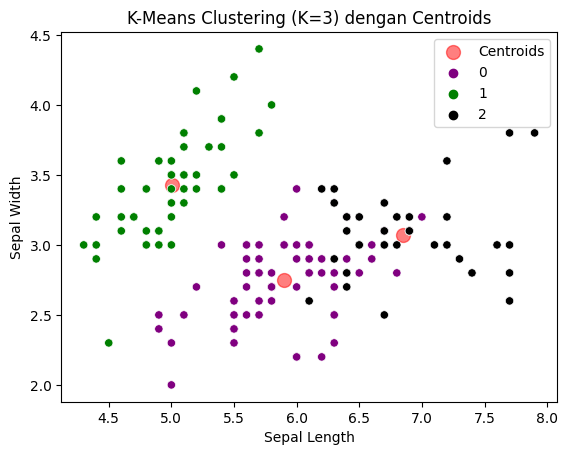

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
iris = sns.load_dataset("iris") # Gunakan dataset Iris dari Seaborn
X = iris.iloc[:, :-1].values # Gunakan fitur X
K = 3 # Pilih angka banyaknya kelompok (K)
kmeans = KMeans(n_clusters=K, n_init=10) # Inisialisasi K-Means
kmeans.fit(X) # Latih model K-Means berdasarkan data X
cluster_labels = kmeans.labels_ # Label kelompok dari model
iris["cluster"] = cluster_labels # Tambahkan kolom prediksi
centroids = kmeans.cluster_centers_ # Titik pusat kelompok dari model
# Visualisasikan kelompok (kluster) data Iris
warna = ["purple", "green", "black"]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100,

label='Centroids')

sns.scatterplot(data=iris, x="sepal_length", y="sepal_width",

hue="cluster", palette=warna)

plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()